# Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [2]:
X_train = pd.read_csv('C:/Users/jaiga/Desktop/Diabetes_Challenge/Diabetes_XTrain.csv')
Y_train = pd.read_csv('C:/Users/jaiga/Desktop/Diabetes_Challenge/Diabetes_YTrain.csv')

# Data Preprocessing and Visualisation

In [3]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               576 non-null    int64  
 1   Glucose                   576 non-null    int64  
 2   BloodPressure             576 non-null    int64  
 3   SkinThickness             576 non-null    int64  
 4   Insulin                   576 non-null    int64  
 5   BMI                       576 non-null    float64
 6   DiabetesPedigreeFunction  576 non-null    float64
 7   Age                       576 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 36.1 KB


In [5]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.758681,119.975694,68.826389,20.364583,76.166667,31.857292,0.481519,32.954861
std,3.328783,31.512914,20.285812,15.893856,109.193550,8.134926,0.336910,11.878137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.975000,0.247750,24.000000
50%,3.000000,116.000000,72.000000,22.000000,36.000000,32.000000,0.381500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,120.000000,36.725000,0.641250,40.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000


In [6]:
#X_mean = X_train.mean(axis = 0)
#X_std = X_train.std(axis = 0)
#X_train = (X_train - X_mean)/ X_std

In [7]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.758681,119.975694,68.826389,20.364583,76.166667,31.857292,0.481519,32.954861
std,3.328783,31.512914,20.285812,15.893856,109.193550,8.134926,0.336910,11.878137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.975000,0.247750,24.000000
50%,3.000000,116.000000,72.000000,22.000000,36.000000,32.000000,0.381500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,120.000000,36.725000,0.641250,40.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000


In [8]:
X_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [9]:
X = X_train.values
Y = Y_train.values
Y = Y.reshape((-1,))

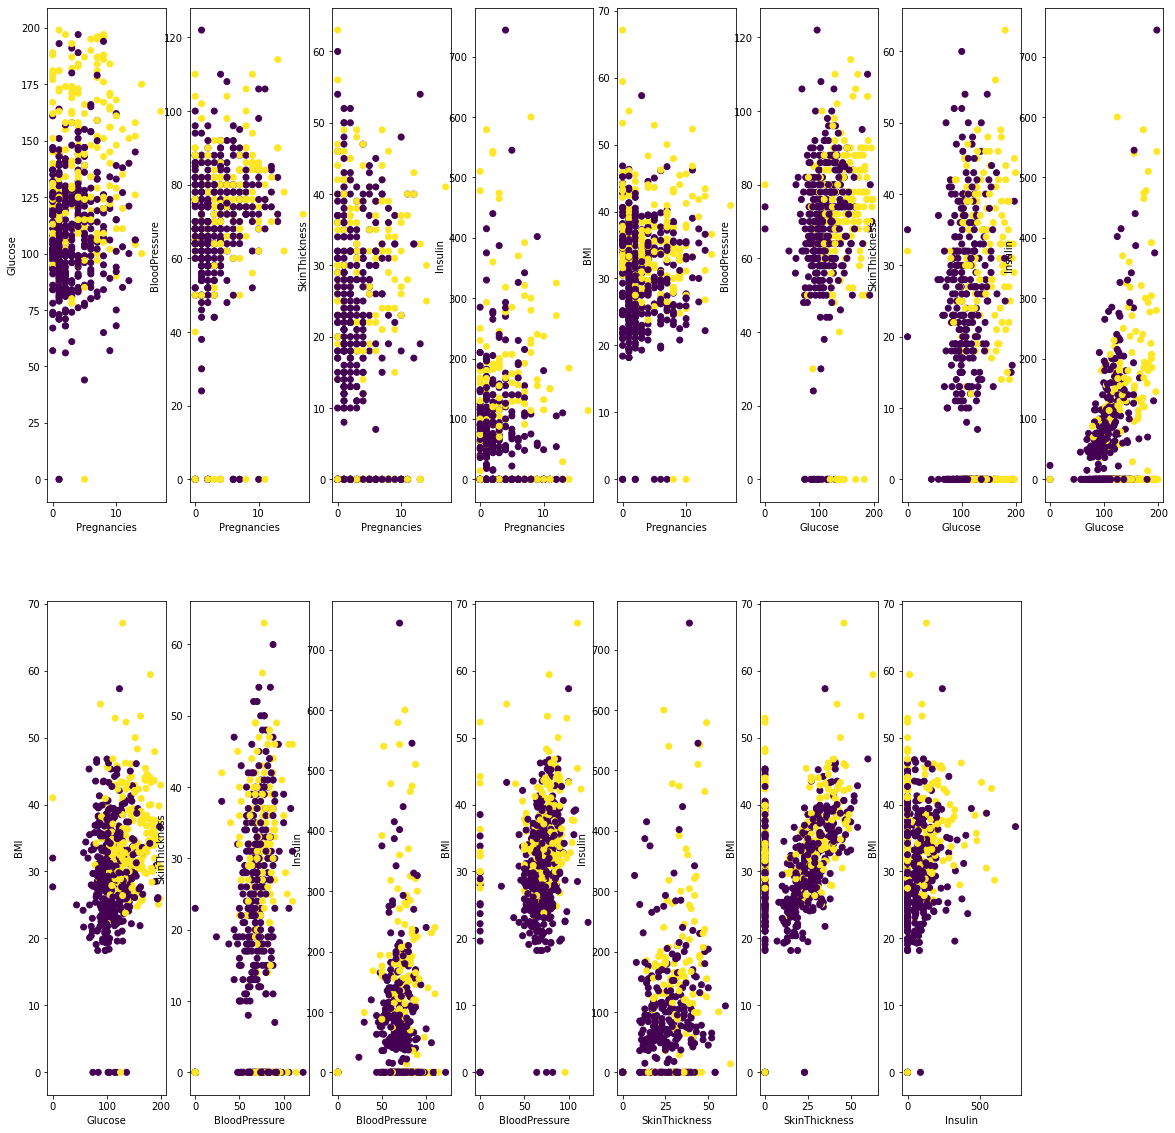

In [10]:
plt.figure(figsize=(20,20))
features = []
for i in range(6):
    for j in range(i+1, 6):
        features.append((i,j))
for i in range(15):
    plt.subplot(2,8,i+1)
    f1, f2 = features[i]
    feature1 = X_train.columns[f1]
    feature2 = X_train.columns[f2]
    a = i//8
    b = i%8
    plt.scatter(X[:,f1], X[:,f2], c = Y)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
plt.show()

# Writing a Custom Class to implement to KNN

In [11]:
class knn:
    def __init__(self, x=5):
        self.k = x
        
    def distance(self, v1, v2):
        return np.sqrt(np.sum((v1-v2)**2))
    
    def predict(self, X_train, Y_train, X_test):
        Y_pred = []
        m = X_test.shape[0]
        for i in range(m):
            x = X_test[i]
            classes = Y_train.tolist()
            dist = []
            n = X_train.shape[0]
            for j in range(n):
                t = X_train[j]
                d = self.distance(x, t)
                dist.append(d)
            info = list(zip(dist, classes))
            info = sorted(info, key= lambda x: x[0])
            final_classes = np.array([i[1] for i in info[:self.k]])
            final_classes = np.unique(final_classes, return_counts=True)
            max_class = np.argmax(final_classes[1])
            pred_class = final_classes[0][max_class]
            Y_pred.append(pred_class)
        Y_pred = np.array(Y_pred)
        return Y_pred

In [12]:
knn_object = knn(x=15)

In [13]:
Y_pred = knn_object.predict(X, Y, X)

In [14]:
def acc(Y,Y_pred):
    score = np.sum((Y==Y_pred))
    print(score)
    return (score/Y.shape[0])*100
acc(Y,Y_pred)

453


78.64583333333334

# Verifying it Using Sklearn

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
sklearn_knn = KNeighborsClassifier(n_neighbors=15)

In [17]:
sklearn_knn.fit(X, Y)

KNeighborsClassifier(n_neighbors=15)

In [19]:
Y_pred_sklearn = sklearn_knn.predict(X)

In [ ]:
acc(Y, Y)

In [15]:
X_test = pd.read_csv('C:/Users/jaiga/Desktop/Diabetes_Challenge/Diabetes_Xtest.csv')
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


In [16]:
#X_test = (X_test - X_mean)/X_std
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


In [17]:
X_ = X_test.values

In [18]:
Y_test_pred = knn_object.predict(X, Y, X_)

In [19]:
Y_df = pd.DataFrame(data = Y_test_pred, columns=['Outcome'])
Y_df.to_csv("Diabetes_Challenge", index=False)